<a href="https://colab.research.google.com/github/Amit22cs/Data-cleaning/blob/main/student_depression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load the Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pointbiserialr, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv('/content/Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0.0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0.0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1.0
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0.0


## **Data Understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     10459 non-null  int64  
 1   Gender                                 10459 non-null  object 
 2   Age                                    10459 non-null  float64
 3   City                                   10459 non-null  object 
 4   Profession                             10459 non-null  object 
 5   Academic Pressure                      10459 non-null  float64
 6   Work Pressure                          10459 non-null  float64
 7   CGPA                                   10459 non-null  float64
 8   Study Satisfaction                     10459 non-null  float64
 9   Job Satisfaction                       10459 non-null  float64
 10  Sleep Duration                         10459 non-null  object 
 11  Di

In [ ]:
unique_counts = df.nunique()
print("\nUnique Values Count:\n", unique_counts)


Unique Values Count:
 id                                       10459
Gender                                       2
Age                                         29
City                                        39
Profession                                   9
Academic Pressure                            6
Work Pressure                                2
CGPA                                       327
Study Satisfaction                           6
Job Satisfaction                             3
Sleep Duration                               6
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64


In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10458.000000,10457.000000,10458.000000
mean,26362.738981,25.844631,3.133760,0.000478,7.666056,2.918348,0.000669,7.171065,3.131586,0.584720
std,15195.315482,4.904154,1.388416,0.048891,1.469650,1.360533,0.048888,3.694602,1.448654,0.492794
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13348.500000,21.000000,2.000000,0.000000,6.280000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,26411.000000,26.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,39419.500000,30.000000,4.000000,0.000000,8.930000,4.000000,0.000000,10.000000,4.000000,1.000000
max,52996.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [ ]:
df.shape

(10459, 18)

## **Data processing and EDA**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df.dtypes

,0
id,int64
Gender,object
Age,float64
City,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64
Study Satisfaction,float64
Job Satisfaction,float64


In [ ]:
df.count()

,0
id,10457
Gender,10457
Age,10457
City,10457
Profession,10457
Academic Pressure,10457
Work Pressure,10457
CGPA,10457
Study Satisfaction,10457
Job Satisfaction,10457


## **Analytical Questions:**

**1. What is the relationship between academic pressure and CGPA?**

Correlation between Academic Pressure and CGPA: -0.024852370637196853


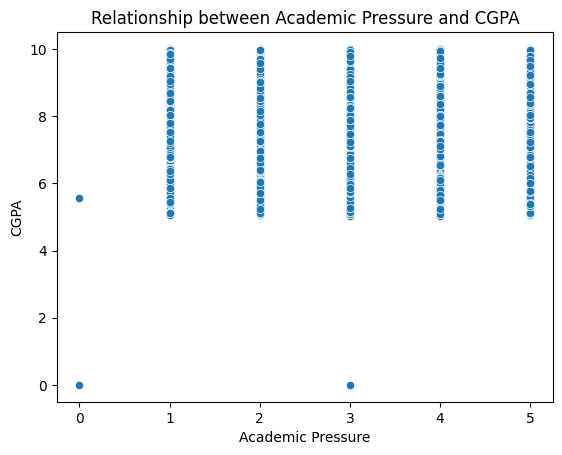

In [ ]:
# Correlation
correlation = df['Academic Pressure'].corr(df['CGPA'])
print("Correlation between Academic Pressure and CGPA:", correlation)

sns.scatterplot(x=df['Academic Pressure'], y=df['CGPA'])
plt.title('Relationship between Academic Pressure and CGPA')
plt.show()

Analysis of Academic Pressure vs. CGPA Scatter Plot Interpretation:

The data points appear widely scattered, indicating no strong pattern between academic pressure and CGPA. There is no clear increasing or decreasing trend. Correlation Coefficient:

The correlation value is -0.022, which is very close to 0. This suggests that Academic Pressure has almost no impact on CGPA (very weak negative correlation). Conclusion: Higher academic pressure does not necessarily lead to higher or lower CGPA. Other factors (study habits, mental health, time management) may play a bigger role in academic performance.

**2. Does sleep duration affect CGPA and study satisfaction?**

In [ ]:
df = df[df['Sleep Duration'] != 'Others']

In [ ]:
print(df['Sleep Duration'].unique())

['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours']


Correlation between Sleep Duration and CGPA: -0.007165496675858884
Correlation between Sleep Duration and Study Satisfaction: 0.004556513613053198


<ipython-input-14-dc5945b1d9d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('Less than 5 hours', 4, inplace=True)
<ipython-input-14-dc5945b1d9d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('5-6 hours', 5.5, inplace=True)
<ipython-input-14-dc5945b1d9d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('7-8 hours', 7.5, inplace=True)
<ipython-input-14-dc5945b1d9d6>:4: FutureWarning: Downcasting

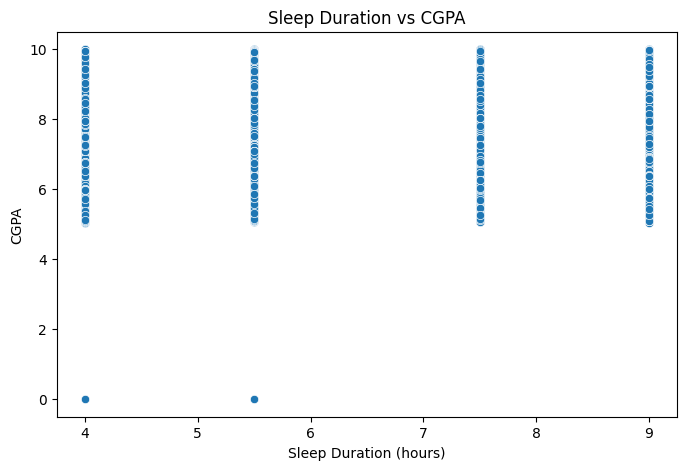

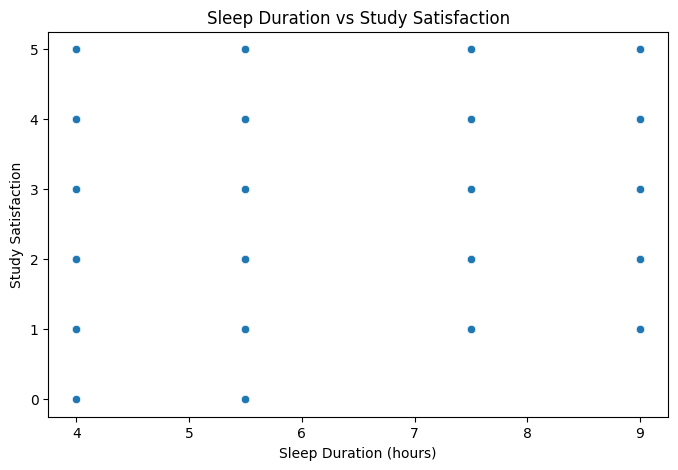

In [ ]:
df.replace('Less than 5 hours', 4, inplace=True)
df.replace('5-6 hours', 5.5, inplace=True)
df.replace('7-8 hours', 7.5, inplace=True)
df.replace('More than 8 hours', 9, inplace=True)

# Check correlation between Sleep Duration and CGPA
corr_sleep_cgpa = df['Sleep Duration'].corr(df['CGPA'])
print("Correlation between Sleep Duration and CGPA:", corr_sleep_cgpa)

# Check correlation between Sleep Duration and Study Satisfaction
corr_sleep_study_satisfaction = df['Sleep Duration'].corr(df['Study Satisfaction'])
print("Correlation between Sleep Duration and Study Satisfaction:", corr_sleep_study_satisfaction)

# Scatter plot: Sleep Duration vs CGPA
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Sleep Duration'], y=df['CGPA'])
plt.title('Sleep Duration vs CGPA')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('CGPA')
plt.show()

# Scatter plot: Sleep Duration vs Study Satisfaction
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Sleep Duration'], y=df['Study Satisfaction'])
plt.title('Sleep Duration vs Study Satisfaction')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Study Satisfaction')
plt.show()

**3. What is the distribution of depression across different degrees (B.Pharm, B.Sc., M.Tech, etc.)?**

Degree
B.Arch      0.591682
B.Com       0.576214
B.Ed        0.552941
B.Pharm     0.544262
B.Tech      0.587302
BA          0.538095
BBA         0.588679
BCA         0.572254
BE          0.542735
BHM         0.559889
BSc         0.580357
Class 12    0.706797
LLB         0.539924
LLM         0.539683
M.Com       0.508651
M.Ed        0.461806
M.Pharm     0.527778
M.Tech      0.511278
MA          0.536697
MBA         0.509174
MBBS        0.572581
MCA         0.537275
MD          0.523810
ME          0.514286
MHM         0.578947
MSc         0.560920
Others      0.764706
PhD         0.527919
Name: Depression, dtype: float64


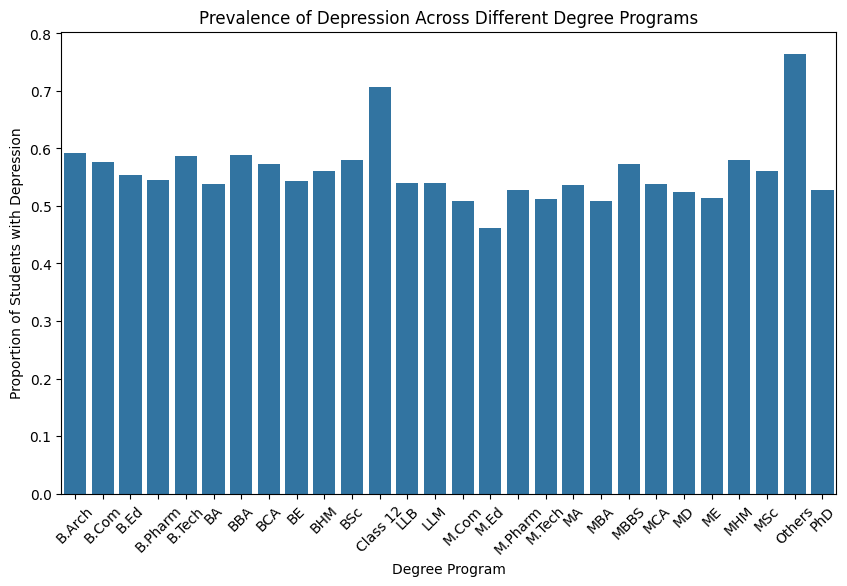

In [ ]:
# Calculate the depression rate per degree program
depression_by_degree = df.groupby('Degree')['Depression'].mean()
print(depression_by_degree)

# Visualize the depression rate by degree program
plt.figure(figsize=(10, 6))
sns.barplot(x=depression_by_degree.index, y=depression_by_degree.values)
plt.title('Prevalence of Depression Across Different Degree Programs')
plt.xlabel('Degree Program')
plt.ylabel('Proportion of Students with Depression')
plt.xticks(rotation=45)
plt.show()

**4. Do students with family histories of mental illness have a higher likelihood of depression?**

<ipython-input-17-03b17029699a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace({'No': 0, 'Yes': 1})


Family History of Mental Illness
0    0.556793
1    0.614625
Name: Depression, dtype: float64


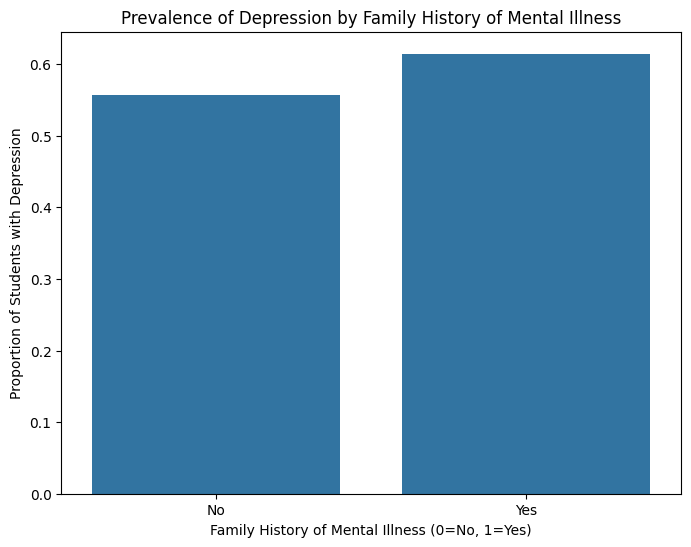

In [ ]:
# Ensure 'Family History of Mental Illness' is binary (Yes = 1, No = 0)
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace({'No': 0, 'Yes': 1})

# Calculate the depression rate by family history of mental illness
depression_by_family_history = df.groupby('Family History of Mental Illness')['Depression'].mean()
print(depression_by_family_history)

# Visualize the depression rate by family history of mental illness
plt.figure(figsize=(8, 6))
sns.barplot(x=depression_by_family_history.index, y=depression_by_family_history.values)
plt.title('Prevalence of Depression by Family History of Mental Illness')
plt.xlabel('Family History of Mental Illness (0=No, 1=Yes)')
plt.ylabel('Proportion of Students with Depression')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

**5. What is the average CGPA for students who have experienced suicidal thoughts versus those who have not?**

In [ ]:
print(df['Have you ever had suicidal thoughts ?'].unique())

['Yes' 'No']


Have you ever had suicidal thoughts ?
0    7.677329
1    7.661398
Name: CGPA, dtype: float64


<ipython-input-19-81d3b3c88966>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].replace({'No': 0, 'Yes': 1})


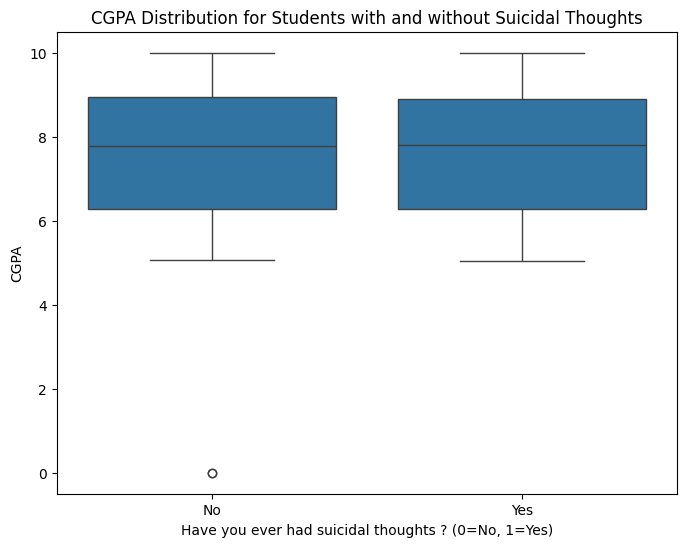

t-statistic: 0.5315665918658552, p-value: 0.5950410603883232


In [ ]:
# Ensure that 'Have you ever had suicidal thoughts ?' is binary (0 for No, 1 for Yes)
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].replace({'No': 0, 'Yes': 1})

# Calculate the average CGPA for students with and without suicidal thoughts
cgpa_by_suicidal_thoughts = df.groupby('Have you ever had suicidal thoughts ?')['CGPA'].mean()
print(cgpa_by_suicidal_thoughts)

# Visualize the CGPA distribution for students with and without suicidal thoughts
plt.figure(figsize=(8, 6))
sns.boxplot(x='Have you ever had suicidal thoughts ?', y='CGPA', data=df)
plt.title('CGPA Distribution for Students with and without Suicidal Thoughts')
plt.xlabel('Have you ever had suicidal thoughts ? (0=No, 1=Yes)')
plt.ylabel('CGPA')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Optional: Independent t-test for CGPA difference between groups
group_no_suicide = df[df['Have you ever had suicidal thoughts ?'] == 0]['CGPA']
group_yes_suicide = df[df['Have you ever had suicidal thoughts ?'] == 1]['CGPA']

# Perform t-test
t_stat, p_value = ttest_ind(group_no_suicide, group_yes_suicide, equal_var=False)
print(f"t-statistic: {t_stat}, p-value: {p_value}")


**6. How do work/study hours correlate with depression?**

Point-Biserial Correlation between Work/Study Hours and Depression: 0.21119649057178574


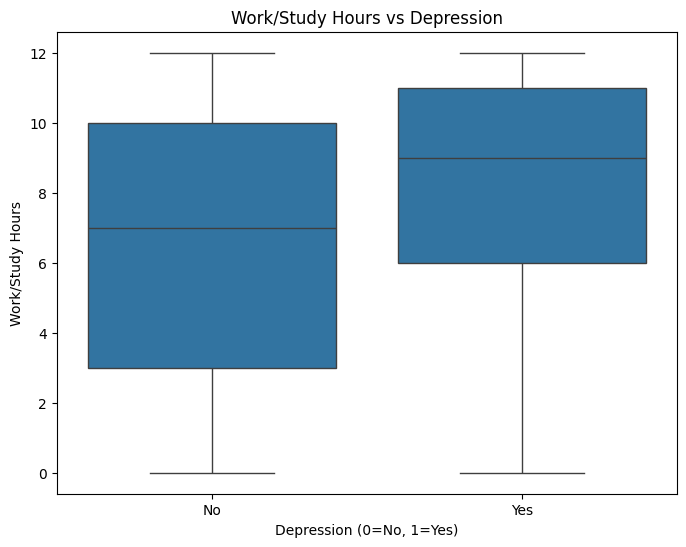

t-statistic: -21.670056750267577, p-value: 1.8649524375957473e-101


In [ ]:
correlation, _ = pointbiserialr(df['Work/Study Hours'], df['Depression'])
print(f"Point-Biserial Correlation between Work/Study Hours and Depression: {correlation}")

# Visualize the relationship between work/study hours and depression
plt.figure(figsize=(8, 6))
sns.boxplot(x='Depression', y='Work/Study Hours', data=df)
plt.title('Work/Study Hours vs Depression')
plt.xlabel('Depression (0=No, 1=Yes)')
plt.ylabel('Work/Study Hours')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Optional: t-test to check if the difference in work/study hours is significant
group_no_depression = df[df['Depression'] == 0]['Work/Study Hours']
group_yes_depression = df[df['Depression'] == 1]['Work/Study Hours']

# Perform t-test
t_stat, p_value = ttest_ind(group_no_depression, group_yes_depression, equal_var=False)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

**7. What is the relationship between academic pressure and study satisfaction?**

Spearman's rank correlation between Academic Pressure and Study Satisfaction: -0.13283603024793084


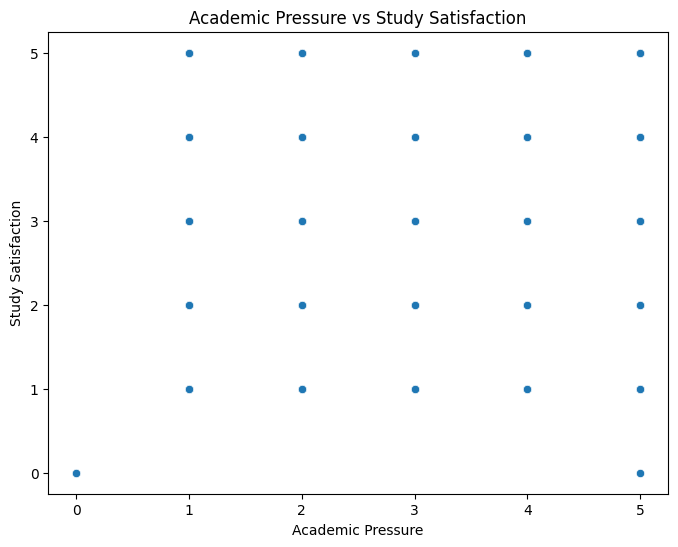

In [ ]:
# Spearman's rank correlation
correlation_spearman = df['Academic Pressure'].corr(df['Study Satisfaction'], method='spearman')
print("Spearman's rank correlation between Academic Pressure and Study Satisfaction:", correlation_spearman)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Academic Pressure', y='Study Satisfaction', data=df)
plt.title('Academic Pressure vs Study Satisfaction')
plt.xlabel('Academic Pressure')
plt.ylabel('Study Satisfaction')
plt.show()

**8.How does financial stress correlate with depression among students?**

Point-Biserial correlation between Financial Stress and Depression: 0.36234257952822935


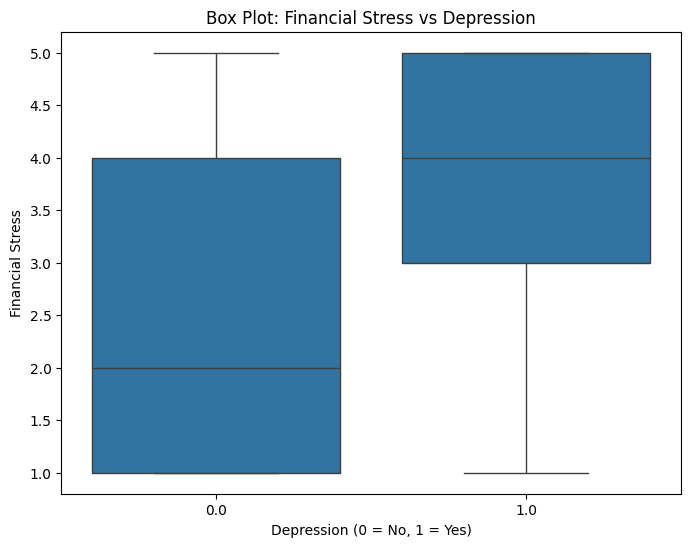

In [ ]:
# Calculate Point-Biserial correlation
correlation, p_value = pointbiserialr(df['Financial Stress'], df['Depression'])
print("Point-Biserial correlation between Financial Stress and Depression:", correlation)

# Box plot for Financial Stress vs Depression
plt.figure(figsize=(8,6))
sns.boxplot(x='Depression', y='Financial Stress', data=df)
plt.title('Box Plot: Financial Stress vs Depression')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Financial Stress')
plt.show()

## **Visualization Questions:**

**1. What is the distribution of CGPA across different levels of academic pressure?**

<ipython-input-23-42ce0c40e7e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Academic Pressure'], y=df['CGPA'], palette='coolwarm')


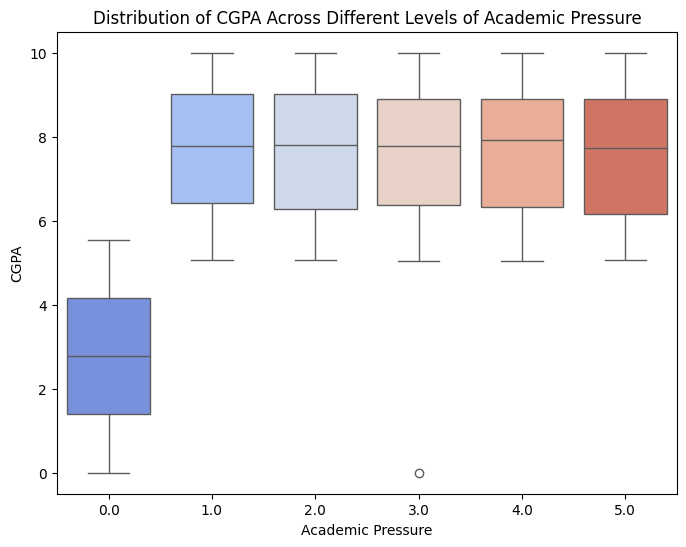

In [ ]:
# Create a box plot
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Academic Pressure'], y=df['CGPA'], palette='coolwarm')
plt.xlabel('Academic Pressure')
plt.ylabel('CGPA')
plt.title('Distribution of CGPA Across Different Levels of Academic Pressure')
plt.show()


<ipython-input-24-33320abb9c7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Academic Pressure', y='CGPA', data=cgpa_means, palette='viridis')


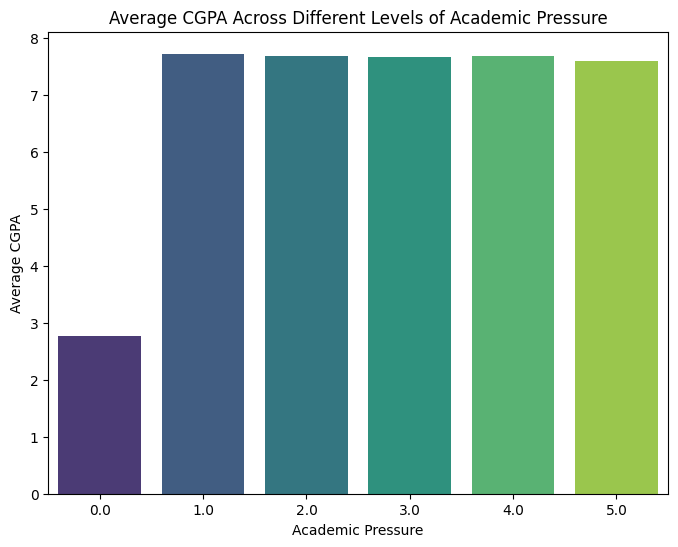

In [ ]:
# Calculate the mean CGPA for each Academic Pressure level
cgpa_means = df.groupby('Academic Pressure')['CGPA'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x='Academic Pressure', y='CGPA', data=cgpa_means, palette='viridis')
plt.xlabel('Academic Pressure')
plt.ylabel('Average CGPA')
plt.title('Average CGPA Across Different Levels of Academic Pressure')
plt.show()


**2. How does sleep duration vary among students with and without depression?**

<ipython-input-25-9a87394afda8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Depression', y='Sleep Duration', data=sleep_means, palette='coolwarm')


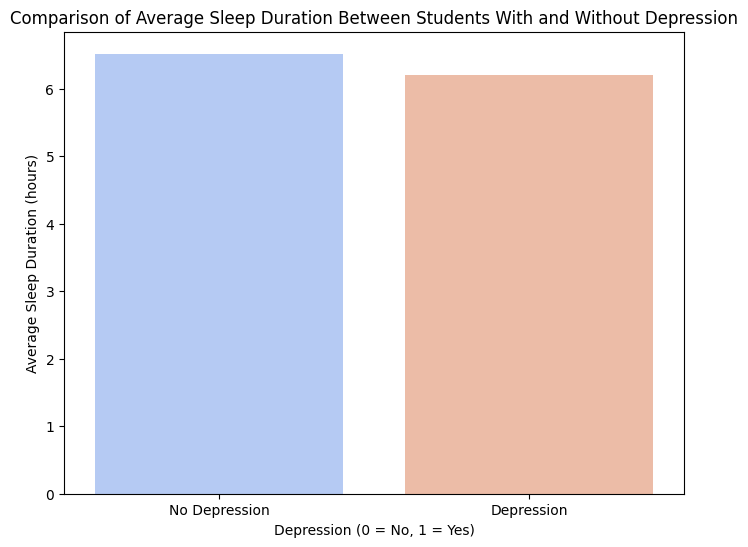

In [ ]:
# Calculate the mean sleep duration for each depression category
sleep_means = df.groupby('Depression')['Sleep Duration'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x='Depression', y='Sleep Duration', data=sleep_means, palette='coolwarm')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Average Sleep Duration (hours)')
plt.title('Comparison of Average Sleep Duration Between Students With and Without Depression')
plt.xticks(ticks=[0,1], labels=['No Depression', 'Depression'])  # Rename x-axis labels
plt.show()


**3. What is the relationship between work/study hours and depression?**

<ipython-input-26-b2b0660eb127>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Depression'], y=df['Work/Study Hours'], palette="coolwarm")


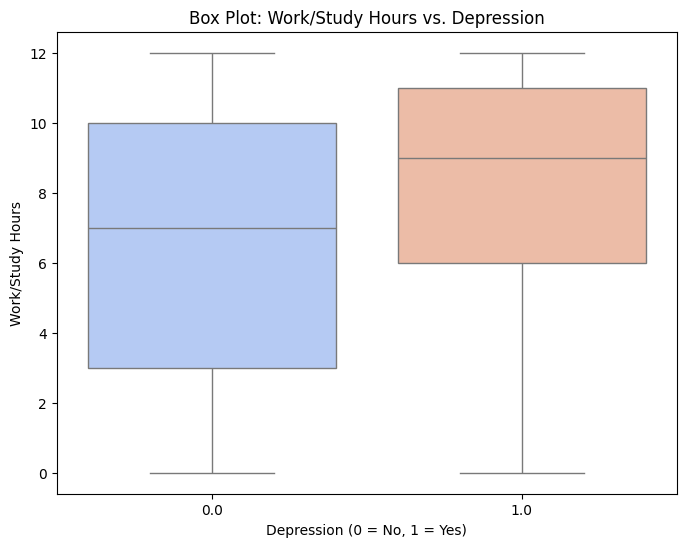

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Depression'], y=df['Work/Study Hours'], palette="coolwarm")

# Labels and title
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Work/Study Hours")
plt.title("Box Plot: Work/Study Hours vs. Depression")
plt.show()

**4. How does study satisfaction vary by CGPA?**

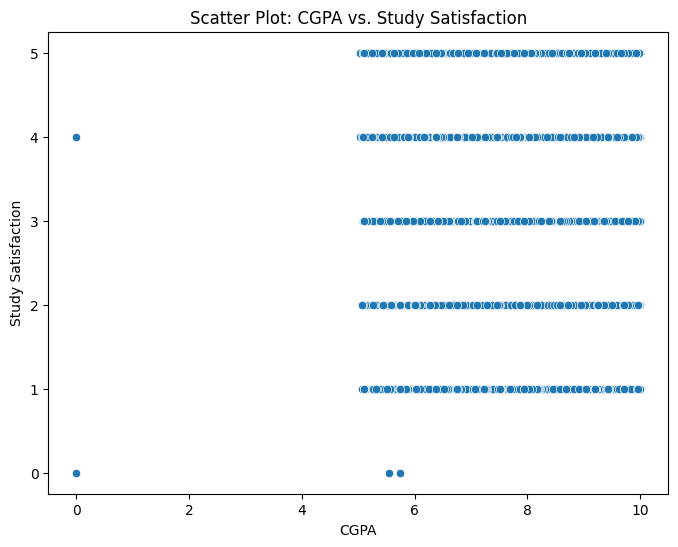

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['CGPA'], y=df['Study Satisfaction'])
plt.xlabel("CGPA")
plt.ylabel("Study Satisfaction")
plt.title("Scatter Plot: CGPA vs. Study Satisfaction")
plt.show()

**5. What percentage of students with a family history of mental illness report depression?**

Percentage of students with a family history of mental illness who report depression: 61.46%
Percentage of students with a family history of mental illness who do NOT report depression: 38.54%


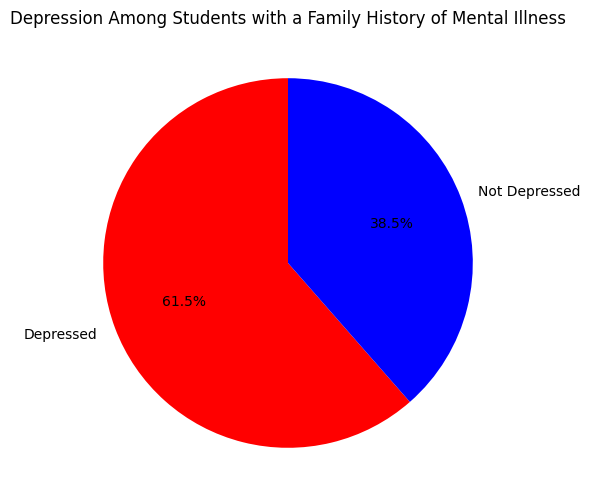

In [ ]:
import matplotlib.pyplot as plt

# Filter students with family history of mental illness
family_history_df = df[df['Family History of Mental Illness'] == 1]

# Count students with depression (1) and without depression (0)
depression_counts = family_history_df['Depression'].value_counts()

# Calculate percentage
total_students = len(family_history_df)
percentage_depressed = (depression_counts[1] / total_students) * 100
percentage_not_depressed = (depression_counts[0] / total_students) * 100

print(f"Percentage of students with a family history of mental illness who report depression: {percentage_depressed:.2f}%")
print(f"Percentage of students with a family history of mental illness who do NOT report depression: {percentage_not_depressed:.2f}%")


# Labels and data
labels = ['Depressed', 'Not Depressed']
sizes = [percentage_depressed, percentage_not_depressed]
colors = ['red', 'blue']

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Depression Among Students with a Family History of Mental Illness")
plt.show()

**6. What is the average CGPA of students based on their degree?**

      Degree      CGPA
18        MA  8.062248
13       LLM  7.896931
2       B.Ed  7.896132
24       MHM  7.838816
6        BBA  7.785585
1      B.Com  7.762630
7        BCA  7.751329
14     M.Com  7.726401
15      M.Ed  7.724583
3    B.Pharm  7.715639
12       LLB  7.689544
27       PhD  7.688782
0     B.Arch  7.688072
4     B.Tech  7.678662
9        BHM  7.667298
17    M.Tech  7.651880
5         BA  7.634429
22        MD  7.618762
16   M.Pharm  7.613519
19       MBA  7.605642
20      MBBS  7.605121
25       MSc  7.587609
11  Class 12  7.577925
10       BSc  7.571399
21       MCA  7.497069
26    Others  7.415294
8         BE  7.368419
23        ME  7.208714


<ipython-input-29-d15a7f6d11d4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CGPA', y='Degree', data=degree_cgpa, palette='viridis')


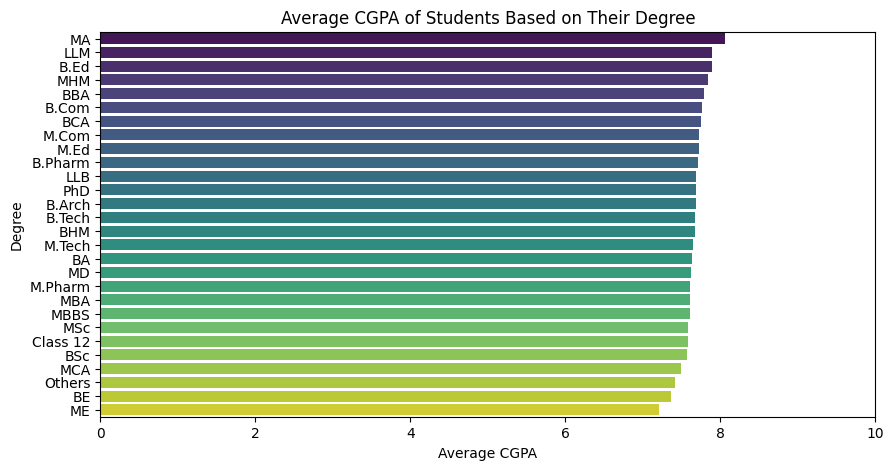

In [ ]:
# Group by 'Degree' and calculate the average CGPA
degree_cgpa = df.groupby('Degree')['CGPA'].mean().reset_index()

# Sort by CGPA for better visualization
degree_cgpa = degree_cgpa.sort_values(by='CGPA', ascending=False)

# Display the average CGPA values
print(degree_cgpa)

# Set figure size
plt.figure(figsize=(10,5))
sns.barplot(x='CGPA', y='Degree', data=degree_cgpa, palette='viridis')
plt.xlabel("Average CGPA")
plt.ylabel("Degree")
plt.title("Average CGPA of Students Based on Their Degree")
plt.xlim(0, 10)  # Assuming CGPA is on a 10-point scale
plt.show()


**7. What is the distribution of suicidal thoughts across different age groups?**

<ipython-input-30-0d0b9ceb38be>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  suicidal_counts = df.groupby('Age Group')['Have you ever had suicidal thoughts ?'].sum().reset_index()
<ipython-input-30-0d0b9ceb38be>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Have you ever had suicidal thoughts ?', data=suicidal_counts, palette='coolwarm')


  Age Group  Have you ever had suicidal thoughts ?
0     15-20                                    810
1     21-25                                   2264
2     26-30                                   2051
3     31-35                                   1439
4     36-40                                      5
5       41+                                      2


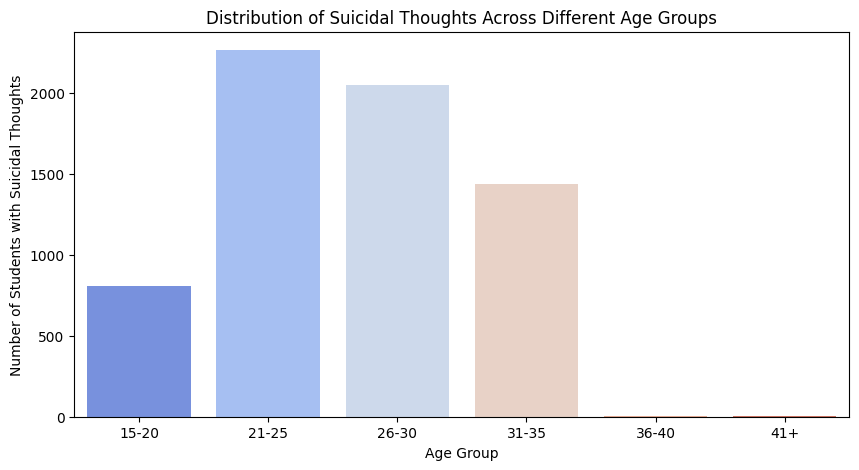

In [ ]:
# Define age bins (customize as needed)
bins = [15, 20, 25, 30, 35, 40, 50]  # Adjust based on your dataset
labels = ["15-20", "21-25", "26-30", "31-35", "36-40", "41+"]

# Create an Age Group column
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the number of students with suicidal thoughts in each age group
suicidal_counts = df.groupby('Age Group')['Have you ever had suicidal thoughts ?'].sum().reset_index()

# Display the counts
print(suicidal_counts)

# Set figure size
plt.figure(figsize=(10,5))
sns.barplot(x='Age Group', y='Have you ever had suicidal thoughts ?', data=suicidal_counts, palette='coolwarm')
plt.xlabel("Age Group")
plt.ylabel("Number of Students with Suicidal Thoughts")
plt.title("Distribution of Suicidal Thoughts Across Different Age Groups")
plt.show()


**8. How does financial stress affect the likelihood of depression across different cities?**

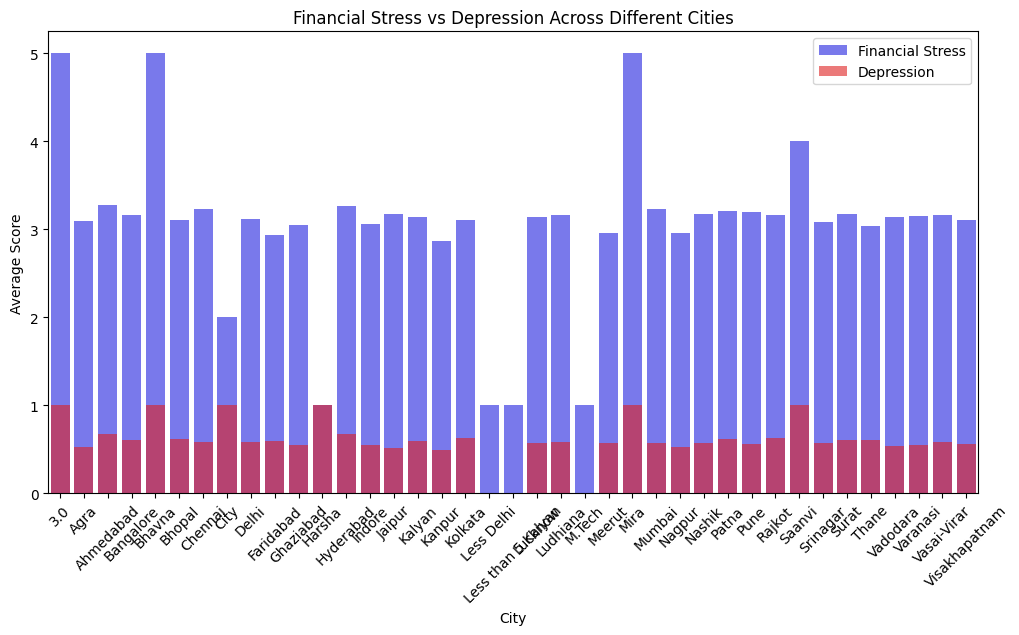

In [ ]:
# Group data by city and calculate the mean for financial stress and depression
city_grouped = df.groupby('City')[['Financial Stress', 'Depression']].mean().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Financial Stress', data=city_grouped, color='blue', alpha=0.6, label='Financial Stress')
sns.barplot(x='City', y='Depression', data=city_grouped, color='red', alpha=0.6, label='Depression')
plt.xlabel('City')
plt.ylabel('Average Score')
plt.title('Financial Stress vs Depression Across Different Cities')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Pivot the data to calculate mean financial stress and depression by city
pivot_data = df.pivot_table(values=['Financial Stress', 'Depression'], index='City', aggfunc='mean')

# Compute the correlation matrix between financial stress and depression across cities
correlation_matrix = pivot_data.corr()

## **Model building**

Model Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       840
         1.0       0.86      0.87      0.86      1250

    accuracy                           0.83      2090
   macro avg       0.83      0.83      0.83      2090
weighted avg       0.83      0.83      0.83      2090



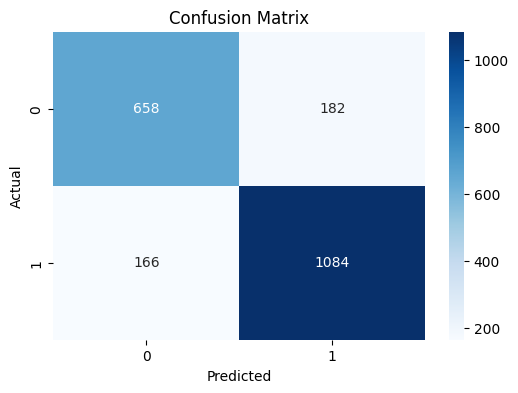

In [ ]:
# Convert categorical variables to numeric (if any)
df = pd.get_dummies(df, drop_first=True)

# Define Features (X) and Target (y)
X = df.drop(columns=["Depression"])
y = df["Depression"]

# Split Data into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       840
         1.0       0.86      0.87      0.86      1250

    accuracy                           0.83      2090
   macro avg       0.83      0.83      0.83      2090
weighted avg       0.83      0.83      0.83      2090



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[ 658  182]
 [ 166 1084]]


## **Model Evaluation & Insights**

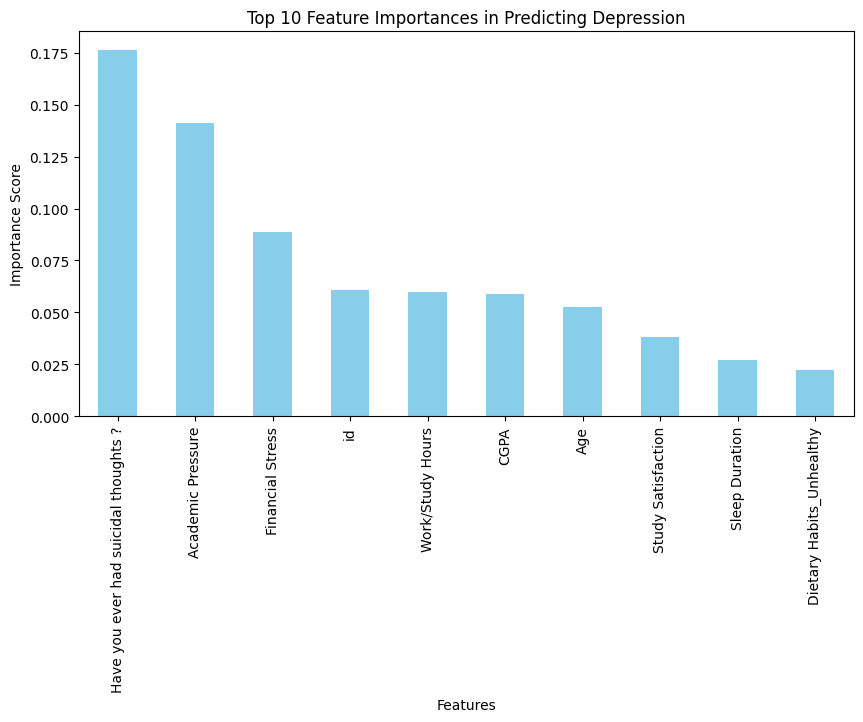

In [ ]:
# Get feature importance scores
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort and visualize the most important features
plt.figure(figsize=(10, 5))
feature_importances.sort_values(ascending=False).head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Feature Importances in Predicting Depression")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()